# Capstone Webscrapping Menggunakan BeautifulSoup

Notebook ini berisi catatan, panduan, dan contoh sederhana mengenai webscrapping menggunakan `BeautifulSoup`. Webscrapping adalah salah satu cara yang dapat digunakan untuk mendapatkan data dari internet. Untuk menggunakan metode webscrapping diperlukan pengetahuan dasar tentang `html`. Berikut dokumentasi [beautifulsoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc) sebagai penunjang untuk Capstone Project ini.

## Latar Belakang

Pada project ini, dilakukan webscrapping data pada situs IMDb. IMDb (Internet Movies Database) adalah situs daring database berisikan informasi tentang film dan tv-series. Kegiatan webscrapping ini hanya untuk tujuan edukasi saja. 

Tujuan dari project ini adalah menentukan tujuh film paling populer di tahun 2021. Webscrapping dilakukan untuk mengambil data `Judul`, `Rating`, `Meta Score`, dan `Votes` sebagai penentu film paling populer tahun 2021. Environment ini sudah merujuk kepada `requirement.txt` dengan nama `webscrap_capstone`.

<img src="assets_notebook/env1.png">

<img src="assets_notebook/env2.png">


___

## Request Data dan Menggunakan Library BeautifulSoup

Dimulai dengan menggunakan metode `get` untuk mengambil data dari laman [disini](https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31). Jangan lupa untuk *import* library `request`

In [2]:
import requests

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31')

Dapat dilihat hasil `get` pada variable `url_get` berisikan data html pada halaman IMDb. Agar tidak terlalu memenuhi, dilakukan *slicing*.

In [98]:
url_get.content[1:500]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_'

Dapat dilihat dari hasil di atas, data html yang didapat tidak terstruktur. Oleh karena itu, digunakan `beautifulsoup` agar tampilan terstruktur dan lebih mudah dipahami. Hasil dari `beautifulsoup` dapat dilihat di bawah ini.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

In [4]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime();


## Menentukan bagian yang ingin diekstrasi menjadi data

Ekstrasi data dapat dilakukan dengan menggunakan fungsi `.find()` dan `.find_all()`. Fungsi `.find()` mengkstrak data satu kali dan yang paling pertama muncul yang sesuai dengan bagian yang ingin diambil di html. Fungsi `.findall()` mengkstrak data semua yang sesuai dengan bagian yang ingin diambil di html. Untuk menspesifikasikan dua fungsi tersebut dapat dikombinasikan dan agar lebih spesifik dapat digunakan juga `attrs`.

Penentuan bagian dapat menggunakan mode **inspect**. Pertama tentukan terlebih dahulu bagian data yang ingin diambil sebagai perwakilan dari seluruh data.

<img src="assets_notebook/lister-list.png">

<img src="assets_notebook/lister-item-content.png">

Dapat dilihat bahwa `lister-list` merupakan bagian seluruh data dan `lister-item-content` adalah bagian spesifik dari data yang ingin diambil. Setelah itu *run code* di bawah dan masukkan ke variabel `tabel`.

In [5]:
table = soup.find('div', attrs={'class':'lister-list'}).find_all('div',attrs={'class':'lister-item-content'})

Pada bagian judul, terletak pada bagian `a href` di dalam `lister-item-header`. Oleh karena itu diperlukan runtutan `.find()` untuk mendapatkan data yang diinginkan. 
<img src="assets_notebook/title.png">
Gunakan `.text` dan `.strip()` agar data yang diambil menjadi ringkas.

In [6]:
table[0].find('h3', attrs={'class':'lister-item-header'}).find('a').text.strip()

'The Black Phone'

Pada bagian rating, terletak pada bagian `inline-block ratings-imdb-rating`.
<img src="assets_notebook/rating.png">
Gunakan `.text` dan `.strip()` agar data yang diambil menjadi ringkas.

In [7]:
table[0].find('div', attrs={'class':'inline-block ratings-imdb-rating'}).text.strip()

'7.3'

Di bagian metascore, terletak pada bagian `span` di dalam `inline-block ratings-metascore`. Oleh karena itu diperlukan runtutan `.find()` untuk mendapatkan data yang diinginkan.
<img src="assets_notebook/metascore.png">
Gunakan `.text` dan `.strip()` agar data yang diambil menjadi ringkas.

In [8]:
float(table[0].find('div', attrs={'class':'inline-block ratings-metascore'}).find('span').text.strip())

65.0

Terakhir untuk votes, terletak pada bagian `span` di dalam `sort-num_votes-visible`. Oleh karena itu diperlukan runtutan `.find()` untuk mendapatkan data yang diinginkan.
<img src="assets_notebook/metascore.png">
Gunakan `.text` dan `.strip()` agar data yang diambil menjadi ringkas.

In [9]:
table[0].find('p', attrs={'class':'sort-num_votes-visible'}).find('span', attrs={'name':'nv'}).text.strip().replace(",","")

'23714'

Mencari panjang baris. Hal ini dilakukan untuk melakukan iterasi pada pengambilan data

In [10]:
row_length = len(table)
row_length

50

Setelah data yang diambil sudah sesuai, selanjutnya dilakukan iterasi untuk mengambil semua data pada satu laman `html`. Alurnya adalah sebagai berikut:
1. Inisiasi `temp` sebagai tuple penyimpan data, `j` sebagai iterasi pertama pada laman pertama imdb(sekali laman memuat 50 judul), `n` sebagai banyaknya judul yang ingin diambil.
2. Iterasi pertama mencakup manipulasi pembukaan laman html agar sesuai berapa banyak data yang ingin diambil
3. Iterasi kedua adalah mengambil data `title`, `rating`, `metascore`, dan `votes` dari 50 data film yang ada di `html`
4. Guna menghindari *error* dikarenakan data yang kurang lengkap, digunakan fungsi `try` dan `except` yang mengembalikan nilai yang hilang menjadi 0
5. Masukkan semua data ke dalam variabel `temp`

In [11]:
temp = [] #init
j = 1
n = 200 #Banyaknya judul yang ingin diambil(kelipatan 50)

while j < 200:
    url_get = requests.get('https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31&start='+str(j)+'&ref_=adv_nxt')
    soup = BeautifulSoup(url_get.content,"html.parser")
    table = soup.find('div', attrs={'class':'lister-list'}).find_all('div',attrs={'class':'lister-item-content'})
    j = j + 50

    for i in range(0, row_length):
    
        #get Title 
        Title = table[i].find('h3', attrs={'class':'lister-item-header'}).find('a').text.strip()
    
        try:
            #get Rating
            Rating = table[i].find('div', attrs={'class':'inline-block ratings-imdb-rating'}).text.strip()
        except AttributeError:
            Rating = 0
 
        try:
            #get meta score
            Meta_Score = table[i].find('div', attrs={'class':'inline-block ratings-metascore'}).find('span').text.strip()
        except AttributeError:
            Meta_Score = 0
        
        try:
            #get votes
            Votes = table[i].find('p', attrs={'class':'sort-num_votes-visible'}).find('span', attrs={'name':'nv'}).\
            text.strip().replace(",","")
        except AttributeError:
            Votes = 0
    
        temp.append((Title,Rating,Meta_Score,Votes)) 
    
temp 

[('The Black Phone', '7.3', '65', '23714'),
 ('Only Murders in the Building', '8.1', 0, '73507'),
 ('Sing 2', '7.4', '49', '55541'),
 ('Spider-Man: No Way Home', '8.3', '71', '672875'),
 ('1883', '8.8', 0, '56044'),
 ('No Time to Die', '7.3', '68', '372866'),
 ('Superman & Lois', '7.8', 0, '30541'),
 ('Last Night in Soho', '7.1', '65', '113071'),
 ('Hacks', '8.2', 0, '25158'),
 ('Dune: Part One', '8.0', '74', '587865'),
 ('Ghostbusters: Afterlife', '7.1', '45', '161908'),
 ('Mad God', '6.8', '80', '4644'),
 ('The Book of Boba Fett', '7.3', 0, '133795'),
 ("You Don't Know Me", '6.8', 0, '3926'),
 ('WandaVision', '7.9', 0, '301249'),
 ('Pleasure', '6.3', '75', '12169'),
 ('Old', '5.8', '55', '109335'),
 ('Eternals', '6.3', '52', '318272'),
 ('Invincible', '8.7', 0, '121087'),
 ('House of Gucci', '6.6', '59', '110751'),
 ('Resident Evil: Welcome to Raccoon City', '5.2', '44', '46932'),
 ('Licorice Pizza', '7.3', '90', '89016'),
 ('Ojing-eo geim', '8.0', 0, '424874'),
 ('Verdens verste men

___

## Membuat Data frame dan Data wrangling

Ubah data pada `temp` menjadi dataframe dengan memakai library `pandas` dan simpan di variabel `df`.

In [12]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('Title','Rating','Meta_Score','Votes'))
df.head()

,Title,Rating,Meta_Score,Votes
0,The Black Phone,7.3,65,23714
1,Only Murders in the Building,8.1,0,73507
2,Sing 2,7.4,49,55541
3,Spider-Man: No Way Home,8.3,71,672875
4,1883,8.8,0,56044


Pembersihan data dilakukan dengan melihat tipe data yang sudah didapat

In [13]:
df.dtypes

Title         object
Rating        object
Meta_Score    object
Votes         object
dtype: object

Setelah dilakukan pengecekan, ada beberapa data yang tidak sesuai dengan pengolahan. merubah tipe data `Rating` dan `Meta_Score` menjadi *float* dan `Votes` menjadi *integer*.

In [14]:
df[['Rating','Meta_Score']] = df[['Rating','Meta_Score']].astype('float64')
df['Votes'] = df['Votes'].astype('int64')
df.dtypes

Title          object
Rating        float64
Meta_Score    float64
Votes           int64
dtype: object

Setelah diperhatikan, pada tabel di atas terdapat judul dengan nilai `Meta_Score` 0. Lakukan subset untuk mengetahui apakah ada persamaan pada judul tersebut.

In [15]:
df[df['Meta_Score'] == 0].head(20)

,Title,Rating,Meta_Score,Votes
1,Only Murders in the Building,8.1,0.0,73507
4,1883,8.8,0.0,56044
6,Superman & Lois,7.8,0.0,30541
8,Hacks,8.2,0.0,25158
12,The Book of Boba Fett,7.3,0.0,133795
13,You Don't Know Me,6.8,0.0,3926
14,WandaVision,7.9,0.0,301249
18,Invincible,8.7,0.0,121087
22,Ojing-eo geim,8.0,0.0,424874
26,Yellowjackets,7.9,0.0,40084


Ternyata judul dengan nilai `Meta_Score` 0 adalah Judul TV-Series, dengan demikian dapat dipisahkan antara Judul Film dan Judul TV-Series dengan dua variabel:
- `Top20Film` : 20 Judul film dengan votes terbanyak
- `Top20Series` : 20 Judul series dengan votes terbanyak

Dikarenakan mencari film paling populer, maka data diurutkan sesuai dengan jumlah `Votes` dan diambil 20 terpopuler. 

In [16]:
Top20Film = df[df['Meta_Score'] != 0].sort_values(by='Votes').tail(20)
Top20Series = df[df['Meta_Score'] == 0].sort_values(by='Votes').tail(20)

In [17]:
Top20Film.tail(7)

,Title,Rating,Meta_Score,Votes
52,Black Widow,6.7,67.0,358651
32,Shang-Chi and the Legend of the Ten Rings,7.4,71.0,360974
5,No Time to Die,7.3,68.0,372866
70,Zack Snyder's Justice League,8.0,54.0,382673
35,Don't Look Up,7.2,49.0,512259
9,Dune: Part One,8.0,74.0,587865
3,Spider-Man: No Way Home,8.3,71.0,672875


In [18]:
Top20Series.tail(7)

,Title,Rating,Meta_Score,Votes
65,Mare of Easttown,8.5,0.0,145881
55,Hawkeye,7.6,0.0,164811
27,Arcane: League of Legends,9.0,0.0,184471
100,The Falcon and the Winter Soldier,7.2,0.0,204801
28,Loki,8.2,0.0,291051
14,WandaVision,7.9,0.0,301249
22,Ojing-eo geim,8.0,0.0,424874


Berikut adalah 7 judul film dan series tahun 2021 dengan `Votes` terbanyak dari situs IMDB

In [19]:
Top20Film = Top20Film.set_index('Title')
Top20Series = Top20Series.set_index('Title')

<AxesSubplot:title={'center':'Tujuh Film Populer Tahun 2021'}, ylabel=' '>

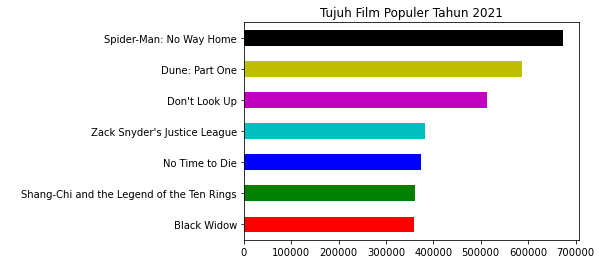

In [20]:
Top20Film.tail(7).plot(kind = 'barh', y = 'Votes', 
                   rot = 0, color = ['r','g','b','c','m','y','k'], 
                   legend=False, title = 'Tujuh Film Populer Tahun 2021',xlabel = ' ', fontsize = '10')

Setelah data didapat, berikut chart Bar film populer tahun 2021

___

### Implementasi flaskapp

1. Buka script python `app.py` di IDE lalu isi sesuai command yang telah tertera
<img src="assets_notebook/get.png">

isi bagian ini dengan *code* untuk bagian mengambil data `html`

<img src="assets_notebook/iteration.png">

isi bagian ini dengan *code* untuk bagian iterasi pengambilan data

<img src="assets_notebook/dataframe.png">

isi bagian ini dengan *code* untuk bagian dataframe dan datawrangling

<img src="assets_notebook/cardtitle.png">

isi bagian ini dengan *code* untuk bagian rata-rata votes

<img src="assets_notebook/generatefilmpop.png">

isi bagian ini dengan *code* untuk bagian chart bar film populer

2. Buka script `index.html` untuk memunculkan hasil dari `app.py`
<img src="assets_notebook/filmpophtml.png">

isi bagian ini untuk menampilkan chart bar film populer

3. Setelah selesai `save` kedua file tersebut lalu run `app.py` setelah itu *webpage* akan muncul
<img src="assets_notebook/flaskweb.png">

## Kesimpulan

Dari data yang didapat terdapat kesimpulan sebagai berikut:
- Film paling populer tahun 2021 adalah **Spider-man: No Way Home**
- Rata - rata film dan tv series 2021 diulas sebanyak 78434 user IMDb
- Judul yang tidak memiliki `Meta_Score` adalah Judul TV-Series

___

### Extra Challange

Dari data yang didapat, film rekomendasi dapat ditampilkan. Data tv-series juga bisa dianalisis untuk tv-series populer dan rekomendasi.  

<AxesSubplot:>

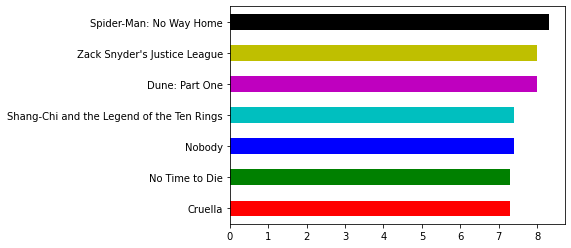

In [21]:
Top20Film.sort_values(by='Rating').tail(7).plot(kind = 'barh', 
                                            y = 'Rating', rot = 0, 
                                            color = ['r','g','b','c','m','y','k'], 
                                            legend=False, xlabel = '')

<AxesSubplot:>

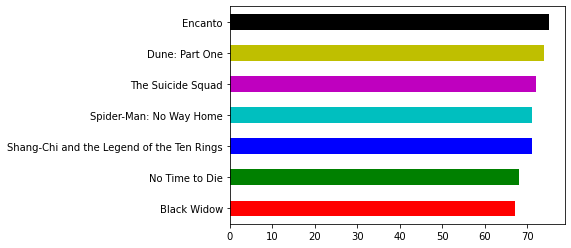

In [22]:
Top20Film.sort_values(by='Meta_Score').tail(7).plot(kind = 'barh', 
                                            y = 'Meta_Score', rot = 0, 
                                            color = ['r','g','b','c','m','y','k'], 
                                            legend=False, xlabel = '')

Jika dirunut dari `Rating` dan `Meta_Score` terlihat perbedaan dari sisi posisi. Oleh karena itu dua nilai tersebut dapat digabung agar mendapat satu hasil yang baru.

In [23]:
Top20Film['Meta_Score'] = Top20Film['Meta_Score']/10

Lakukan normalisasi pada nilai `Meta_Score` agar penjumlahan sesuai setelah itu masukkan ke kolom baru, `Meta_Rating`.

In [24]:
Top20Film['Meta_Rating'] = Top20Film['Rating'] + Top20Film['Meta_Score']

<AxesSubplot:title={'center':'Tujuh Film Rekomendasi Tahun 2021'}>

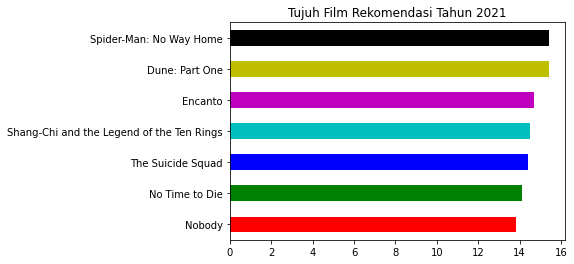

In [25]:
Top20Film.sort_values(by='Meta_Rating').tail(7).plot(kind = 'barh', 
                                            y = 'Meta_Rating', rot = 0, 
                                            color = ['r','g','b','c','m','y','k'], 
                                            legend=False, title = 'Tujuh Film Rekomendasi Tahun 2021', xlabel = '')

Terlihat hasil dari chart bar, untuk film rekomendasi tahun 2021

<AxesSubplot:title={'center':'Tujuh TV-Series Populer Tahun 2021'}>

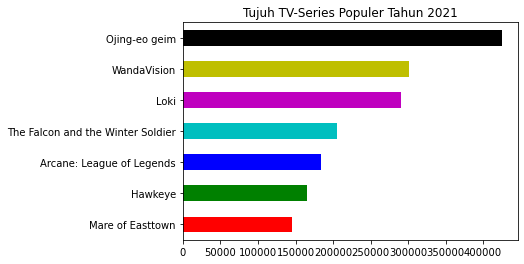

In [26]:
Top20Series.tail(7).plot(kind = 'barh', y = 'Votes', 
                   rot = 0, color = ['r','g','b','c','m','y','k'], 
                   legend=False, title = 'Tujuh TV-Series Populer Tahun 2021',xlabel = '',fontsize = '10')

Karena didapat data untuk tv series juga, maka bisa disimpulkan juga tv-series populer tahun 2021

<AxesSubplot:>

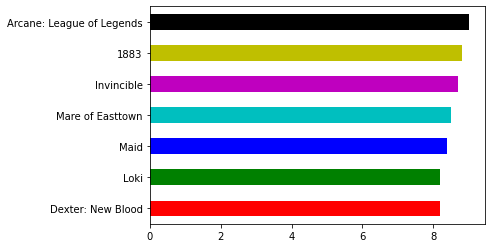

In [27]:
Top20Series.sort_values(by='Rating').tail(7).plot(kind = 'barh', 
                                            y = 'Rating', rot = 0, 
                                            color = ['r','g','b','c','m','y','k'], 
                                            legend=False, xlabel = '')

Berikut rekomendasi tv-series tahun 2021. Dikarenakan tidak ada nilai `Meta_Score` maka dapat diurutkan menggunakan `Rating` saja.

## Kesimpulan Extra Challenge

Dari data yang didapat terdapat kesimpulan sebagai berikut:
- Film paling yang direkomendasikan tahun 2021 adalah **Spider-man: No Way Home**
- TV-Series paling populer tahun 2021 adalah **Ojing-eo geim** atau lebih dikenal dengan nama **Squid Games**
- TV-Series paling yang direkomendasikan tahun 2021 adalah **Arcane: League of Legends**

**Semua data di-*run* pada tanggal 10 Juli 2022**